# IDS2022-2023 Project

In [2]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("Google-Playstore.csv")
data.drop(columns=["App Name"])
data.shape

(2312944, 24)

In [26]:
data_orig = data.copy(deep=True)

In [38]:
data_clean = data.drop(columns=["App Id", "App Name", "Developer Website", "Developer Email", "Scraped Time", "Developer Id"])
data_clean.head(20)

,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False
1,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False
2,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False
3,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False
4,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False
5,Social,0.0,0.0,50+,50.0,89,True,0.0,USD,46M,6.0 and up,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False
6,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,USD,2.5M,4.1 and up,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False
7,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,USD,16M,5.0 and up,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False
8,Communication,0.0,0.0,10+,10.0,18,True,0.0,USD,1.3M,4.4 and up,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False
9,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,USD,3.5M,4.1 and up,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False


<AxesSubplot:>

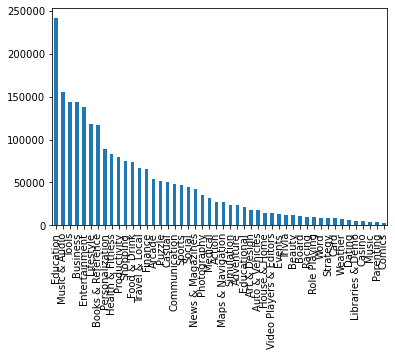

In [8]:
data_clean.Category.value_counts().plot(kind="bar")

<AxesSubplot:>

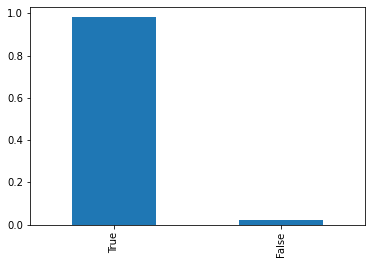

In [12]:
data_clean.Free.value_counts(normalize=True).plot(kind="bar")

In [53]:
data_clean = data_orig.copy(deep=True)
def categorize(p):
    if (p == 0):
        return 0
    if (p < 5):
        return 1 
    elif (p < 10):
        return 2
    else:
        return 3
data_clean.Price = data_clean.Price.map(categorize)
data_clean.Price.value_counts()

                                            App Name  \
0                                            Gakondo   
1                                Ampere Battery Info   
2                                             Vibook   
3  Smart City Trichy Public Service Vehicles 17UC...   
4                                            GROW.me   

                       App Id       Category  Rating  Rating Count Installs  \
0         com.ishakwe.gakondo      Adventure     0.0           0.0      10+   
1  com.webserveis.batteryinfo          Tools     4.4          64.0   5,000+   
2        com.doantiepvien.crm   Productivity     0.0           0.0      50+   
3     cst.stJoseph.ug17ucs548  Communication     5.0           5.0      10+   
4        com.horodyski.grower          Tools     0.0           0.0     100+   

   Minimum Installs  Maximum Installs  Free  Price  ...  \
0              10.0                15  True    0.0  ...   
1            5000.0              7662  True    0.0  ...   
2          

0    2268011
1      36620
2       5349
3       2964
Name: Price, dtype: int64

In [54]:
def cat_rating(r):
    if (r<1):
        return 0
    elif (r<2):
        return 1
    elif (r<3):
        return 2
    elif (r<4):
        return 3
    elif (r<5):
        return 4
print(data_clean.Rating.value_counts())
data_clean.Rating = data_clean.Rating.map(cat_rating)
data_clean.Rating.value_counts()


0.0    1059762
5.0     100122
4.2      87993
4.4      86304
4.3      83276
4.6      78302
4.5      76753
4.1      69723
4.0      67342
4.7      62205
4.8      61109
3.9      55684
3.8      53863
4.9      44524
3.7      43300
3.6      35989
3.5      31636
3.4      28908
3.3      22613
3.2      21485
3.0      17275
3.1      15539
2.8      12235
2.9      11522
2.6       9213
2.7       9200
2.5       6942
2.4       6051
2.3       5414
2.2       4954
2.0       3804
2.1       3675
1.8       2957
1.9       2588
1.7       1928
1.6       1644
1.5       1157
1.4       1011
1.0        713
1.3        579
1.2        531
1.1        236
Name: Rating, dtype: int64


0.0    1059762
4.0     717531
3.0     326292
2.0      73010
1.0      13344
Name: Rating, dtype: int64